<a href="https://colab.research.google.com/github/griffincorriher/1301project/blob/main/parkinginfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Import modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import io

In [75]:
#Create dataframe of parkinginfo csv
df=pd.read_csv('https://raw.githubusercontent.com/griffincorriher/UNCC-parkinging-availabilty-scraper/main/parkinginfo.csv')

In [76]:
#Verify dataframe works and view headings
df.head(10)

,date,day,time,name,cap
0,9/22/2021,Wednesday,21:00,ConeDeckFaculty/Staff,0
1,9/22/2021,Wednesday,21:00,ConeDeckVisitor,6
2,9/22/2021,Wednesday,21:00,CRIDeck,4
3,9/22/2021,Wednesday,21:00,EastDeck1,8
4,9/22/2021,Wednesday,21:00,EastDeck2/3,4
5,9/22/2021,Wednesday,21:00,NorthDeck,26
6,9/22/2021,Wednesday,21:00,SouthVillageDeck,51
7,9/22/2021,Wednesday,21:00,UnionDeckLower,19
8,9/22/2021,Wednesday,21:00,UnionDeckUpper,0
9,9/22/2021,Wednesday,21:00,WestDeck,10


In [4]:
df.groupby(['name'])['cap'].max()

name
CRIDeck                  20
ConeDeckFaculty/Staff    51
ConeDeckVisitor          17
EastDeck1                27
EastDeck2/3              17
NorthDeck                50
SouthVillageDeck         60
UnionDeckLower           34
UnionDeckUpper           24
WestDeck                 36
Name: cap, dtype: int64

In [5]:
df.groupby(['time'])['cap'].mean()

time
00:00    11.30
00:30    11.35
01:00    11.40
01:30    11.35
02:00    11.30
02:30     9.90
03:00    11.30
03:30    10.00
04:00    10.20
04:30    10.30
05:00    10.30
05:30    10.40
06:00    10.50
06:30    11.20
07:00    12.10
07:30    14.00
08:00    17.20
08:30    20.60
09:00    24.10
09:30    25.50
10:00    27.30
10:30    28.10
11:00    28.70
11:30    29.10
12:00    28.90
12:30    28.30
13:00    29.40
13:30    30.20
14:00    30.10
14:30    29.50
15:00    28.60
15:30    27.70
16:00    25.90
16:30    23.00
17:00    20.50
17:30    17.60
18:00    16.30
18:30    15.70
19:00    15.20
19:30    15.00
20:00    14.90
20:30    13.40
21:00    12.75
21:30    12.35
22:00    12.05
22:30    11.60
23:00    11.55
23:30    11.25
Name: cap, dtype: float64

In [6]:
decks = df.groupby('name')
dates = df.groupby('date')
days = df.groupby('day')
coneFaculty = decks.get_group('ConeDeckFaculty/Staff') 
coneVisitor = decks.get_group('ConeDeckVisitor') 
cri = decks.get_group('CRIDeck') 
east1 = decks.get_group('EastDeck1') 
east23 = decks.get_group('EastDeck2/3') 
north = decks.get_group('NorthDeck') 
southVillage = decks.get_group('SouthVillageDeck') 
unionLower = decks.get_group('UnionDeckLower')
unionUpper = decks.get_group('UnionDeckUpper') 
west = decks.get_group('WestDeck')



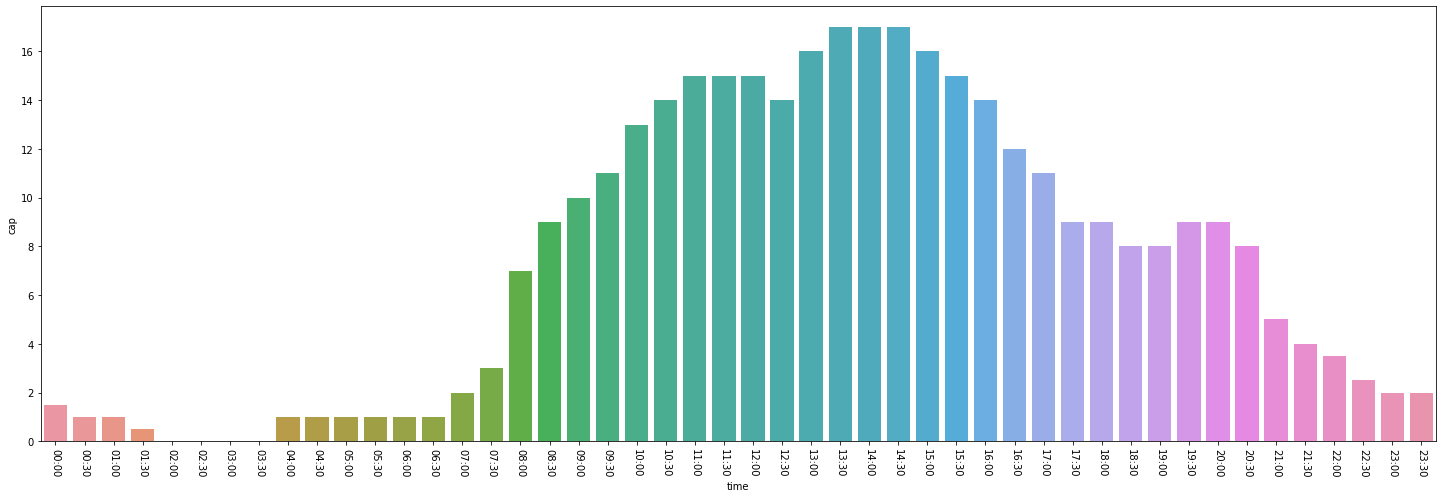

In [129]:
#Create barplot of 'Deck' sorted by time
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
i = east23
ax = sns.barplot(y='cap',
            x='time',
            data=i,
            ci=None,
            ax=ax, 
            order=i.groupby('time').agg('mean').sort_values(by='time',ascending=True).index                                     
            )
plt.xticks(rotation=-90)
plt.show()

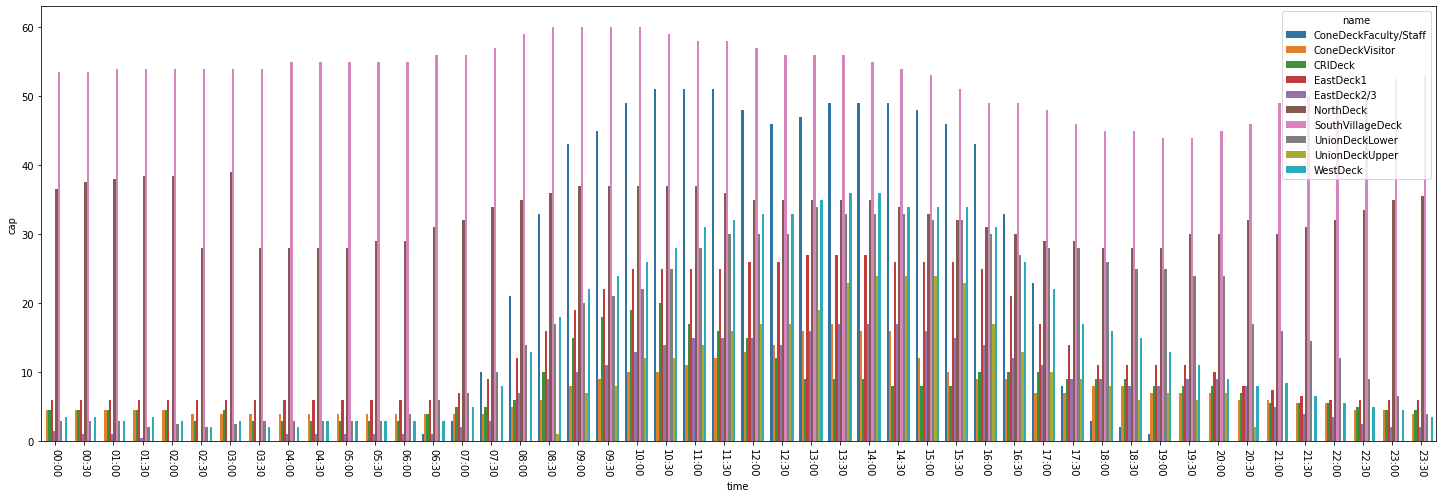

In [132]:
#Create barplot of 'Deck' sorted by time
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
i = east23
ax = sns.barplot(y='cap',
            x='time',
            data=df,
            ci=None,
            ax=ax, 
            hue='name',
            order=df.groupby('time').agg('mean').sort_values(by='time',ascending=True).index                                     
            )
plt.xticks(rotation=-90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


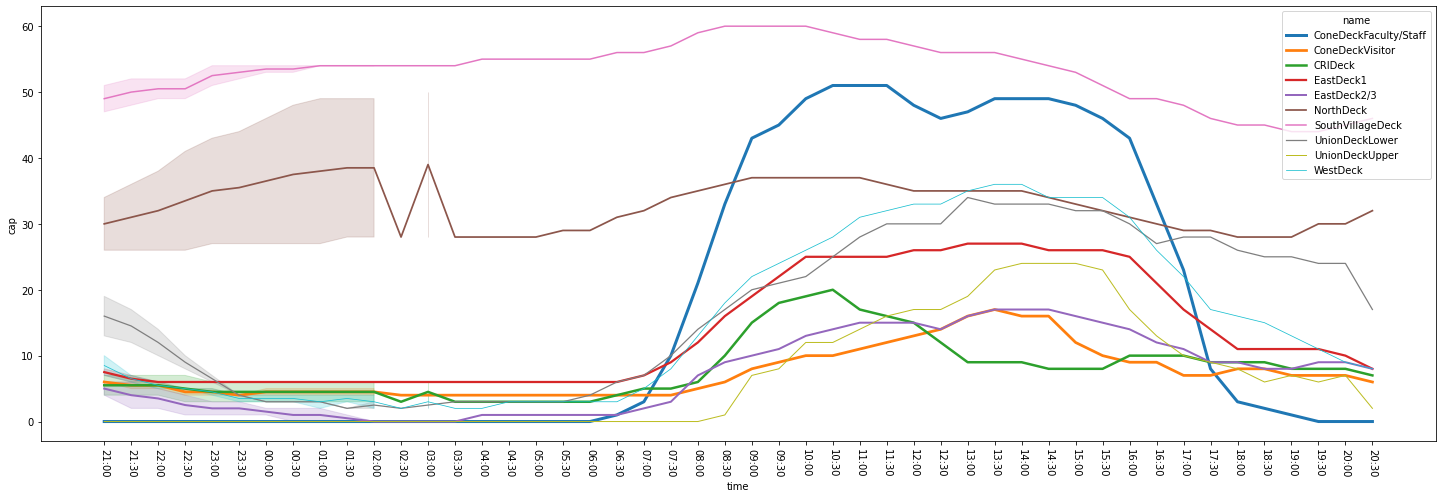

In [126]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
i = east23
sns.lineplot(df.time, df.cap, data=df, ax=ax, hue='name', size='name')
plt.xticks(rotation=-90)
plt.show()